<a href="https://colab.research.google.com/github/eaaslan/HW1_EnesAlp_Aslan/blob/master/BIM459_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIM459 AI in Healthcare Homework 3 - Building your own CNNs

In this assignment you'll implement key components of a Convolutional Neural Network, or CNN, using TensorFlow and Keras API! You may use your local computer GPU/CPU or you may use Colab environment. For Colab environment please refer to the BIM459_HW3_Colab.pdf document.  

<br>

If you have any questions or technical problems, please email to [umutkaankavakli@ogr.eskisehir.edu.tr](mailto:umutkaankavakli@ogr.eskisehir.edu.tr) or visit AI in Healthcare lab in his office hours (Mondays and Wednesdays between 1 - 2 pm.).

<br>

By the end of this assignment, you'll be able to:

* Discover the MNIST dataset of Medical Imaging: <b>MedMNIST</b>
* Implement a basic CNN architecture
* Define an appropriate loss function, an optimizer and metrics to train your model
* Visualize the results
* Evaluate your model's performance

<center>  <img src="https://drive.google.com/thumbnail?id=1Q1rIFnRiF_w0ef4mn28btOucuVbyWo3M&sz=w800" alt="Your Image Alt Text"> </center>

You will build an end-to-end pipeline to train and test your model on skin diseases. The implementation steps will be similar to the lecture slide above.

<br>

Start by downloading your data from the next cell. Please run the cells below and import required libraries:

In [1]:
!gdown 1A0lMLLg-NuYoSQYKwrWoMbYA1T6eO1nH

Downloading...
From (original): https://drive.google.com/uc?id=1A0lMLLg-NuYoSQYKwrWoMbYA1T6eO1nH
From (redirected): https://drive.google.com/uc?id=1A0lMLLg-NuYoSQYKwrWoMbYA1T6eO1nH&confirm=t&uuid=20555f26-ad5f-43e2-a011-bbd63d58a616
To: /content/utils.py
100% 745/745 [00:00<00:00, 4.18MB/s]


In [2]:
# you can import necessary libraries for your homework solution

import tensorflow as tf
import matplotlib.pyplot as plt

from utils import *

### Clinical Problem Definition & Data Curation & Data Annotation
Your problem will be automatically detecting skin diseases. You will use <b>DermaMNIST</b> from MedMNIST dataset, which contains 7,007 training, 1,003 validation and 2,005 test samples</b>, in total 10,015 images! You can choose from different image resolutions: 28x28, 64x64, 128x128 or 256x256. Higher resolution offer more detailed images but requires more computation power. <b>The size of images is up to you.</b>

<center>  <img src="https://drive.google.com/thumbnail?id=1ZG4z1aNJlzI-K3rTQTP5Vdg1hprmyPZt&sz=w800" alt="Your Image Alt Text"> </center>

As you can see, the details in the images changes depending on the image resolution. The resolution will affect your model performance as well. You can have more information if you want: [MedMNIST Website](https://medmnist.com) or [MedMNIST Github](https://github.com/MedMNIST/MedMNIST)


In [3]:
# you can change size parameter with one of 64, 128 and 224
# this might take some time
train_images, train_labels, val_images, val_labels, test_images, test_labels = load_data(size='28')

In [4]:
print(f'The shape of Training images: {train_images.shape}')
print(f'The shape of Training labels: {train_labels.shape}\n')
print(f'The shape of Validation images: {val_images.shape}')
print(f'The shape of Validation labels: {val_labels.shape}\n')
print(f'The shape of Test images: {test_images.shape}')
print(f'The shape of Test labels: {test_labels.shape}')

The shape of Training images: (7007, 28, 28, 3)
The shape of Training labels: (7007, 1)

The shape of Validation images: (1003, 28, 28, 3)
The shape of Validation labels: (1003, 1)

The shape of Test images: (2005, 28, 28, 3)
The shape of Test labels: (2005, 1)


### The Categories

You can see some examples of different classes in your dataset below. The images are 224x224 samples that have more detail than other sizes.

<br>

<center>  <img src="https://drive.google.com/thumbnail?id=1VRTZpM94LYk0yK5sax27JTn7XxP0SgA3&sz=w700" alt="The categories of sample images"> </center>

Your problem will be automatically detecting skin diseases. The dataset contains 7 classes. Therefore, this is the one of multi-class problems. You don't need to worry about what these names represent but if you want to know this dataset better, you can check the original paper of the [HAM10000 dataset for DermaMNIST](https://arxiv.org/pdf/1803.10417.pdf "The HAM10000 paper"). You can check the values of <b>train_labels</b>, <b>val_labels</b> and <b>test_labels</b> to see the range is between <b>0 and 6</b>. You will need this information later.


In [5]:
print(f'The number of class 0 (akiec): {sum(train_labels == 0).item():3}')
print(f'The number of class 1 (bcc): {sum(train_labels == 1).item():5}')
print(f'The number of class 2 (bkl): {sum(train_labels == 2).item():5}')
print(f'The number of class 3 (df): {sum(train_labels == 3).item():5}')
print(f'The number of class 4 (nv): {sum(train_labels == 4).item():6}')
print(f'The number of class 5 (mel): {sum(train_labels == 5).item():6}')
print(f'The number of class 6 (vasc): {sum(train_labels == 6).item():3}')

The number of class 0 (akiec): 228
The number of class 1 (bcc):   359
The number of class 2 (bkl):   769
The number of class 3 (df):    80
The number of class 4 (nv):    779
The number of class 5 (mel):   4693
The number of class 6 (vasc):  99


### Imbalanced Dataset Problem
As you can see in the code cell above, the number of samples for each class are different. The class 5 (mel) has a large number of samples, while classes 3 (df) and 6 (vasc) have very a few samples. This problem is called data imbalance, where the model tends to focus on learning the dominant classes and neglects the smaller classes. This is one of the challenging problem in machine learning training which reduces the model performance. (Even though there are some methods to deal with data imbalance problem, you don't need to apply them here.)

<br>

Since your dataset is not balanced, you cannot trust the result of <b>accuracy</b> metric because it performs well on balanced dataset. For example, consider you have 9900 samples for class 0 and 100 samples for class 1. If your model predicts all samples as class 0, your accuracy will be
$$
Accuracy = \frac{9900}{10000} = 99\%
$$

However, your predictions for class 1 are all wrong which is $0\%$. Therefore, you also need to use different metrics in addition to the accuracy. Precision, Recall and F1-Score are valuable metrics which calculate the performance of the model more accurately. There are some terminologies to calculate these metrics:

<b>TP: </b> True positive. This represents the number of correct prediction that a class exists.

<b>TF: </b> True negative. This represents the number of correct prediction that a class does not exist.

<b>FP: </b> False positive. This represents the number of incorrect prediction that a class exists (not exist in real).

<b>FN: </b> False positive. This represents the number of incorrect prediction that a class does not exist (exist in real).

<br>

<b>Accuracy: </b> Number of correct predictions in total samples:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

<br>

<b>Precision </b> (also called positive predictive value) is the number of correct predictions in predicted positive samples.

$$
Precision = \frac{TP}{TP + FP}
$$

<br>

<b>Recall</b> (also known as sensitivity) is the the number of correct predictions in actual positive samples.

$$
Recall = \frac{TP}{TP + TN}
$$


<b>F1-Score </b> is the harmonic mean of precision and recall metrics.

$$
F1 = 2*\frac{precision*recall}{precision + recall}
$$

<br>

You don't need to implement these metrics on your own but it is a good habit to understand where these metrics come from. You can use these metrics using Keras API or scikit-learn.

<br>

<center>  <img src="https://drive.google.com/thumbnail?id=1VFSV7lcXO6Vcu0G52CzrqlpxpNrA9SIA&sz=w400" alt="The categories of sample images"> </center>

<b>Credits: </b> [Wikipedia - Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall)

<br>

### Preprocessing

## Task 1
The intensity values of images in the dataset are between 0 and 255. You need to <b>normalize</b> these values so they can be between 0 and 1. Don't forget to apply this convertion for all of training, validation and test dataset (Don't do anything with labels!).

In [6]:
train_images = train_images/ 255
val_images = val_images/ 255
test_images = test_images/ 255




### Building Your Model

You are ready to implement your CNN model with Tensorflow/Keras. [Keras](https://keras.io/getting_started) is an API that uses TensorFlow to simplify machine learning model implementation. You will use the Keras to implement your custom model. Before starting, remember the components of a CNN:

<br>

A <b>convolution layer</b> is a fundamental component of the CNN architecture that performs feature extraction, which typically consists of a combination of linear and nonlinear operations, i.e., convolution operation and activation function.

<center> <img src="https://drive.google.com/thumbnail?id=1S_h5C-um--z8zIYjxEaBZMAL_1ec8mU1&sz=w800" alt="CNN layer"> </center>

<br>

The outputs of a linear operation such as convolution are then passed through a nonlinear <b>activation function</b>. Although smooth nonlinear functions, such as sigmoid or hyperbolic tangent <b>(tanh)</b> function, were used previously because they are mathematical representations of a biological neuron behavior, the most common nonlinear activation function used presently is the rectified linear unit <b>(ReLU)</b>, which simply computes the function: f(x) = max(0, x)

<center> <img src="https://drive.google.com/thumbnail?id=1v0mVUtly8hQ_kqD6OihapcfpBr-0eR7-&sz=w800" alt="CNN layer"> </center>

<br>

A <b>pooling layer</b> provides a typical downsampling operation which reduces the in-plane dimensionality of the feature maps in order to introduce a translation invariance to small shifts and distortions, and decrease the number of subsequent learnable parameters. It is of note that there is no learnable parameter in any of the pooling layers, whereas filter size, stride, and padding are hyperparameters in pooling operations, similar to convolution operations. You may select <b>Max Pooling</b> or <b>Global Average Pooling</b>
to downsample your feature maps.

<center> <img src="https://drive.google.com/thumbnail?id=17FLVHPejeSZVn4TzjBTOyG8KxfQQPKb0&sz=w800" alt="Pooling layer"> </center>

<br>

The output feature maps of the final convolution or pooling layer is typically flattened, i.e., transformed into a one-dimensional (1D) array of numbers (or vector), and connected to one or more fully connected layers (or Dense layers), also known as dense layers, in which every input is connected to every output by a learnable weight. Once the features extracted by the convolution layers and downsampled by the pooling layers are created, they are mapped by a subset of fully connected layers to the final outputs of the network, such as the probabilities for each class in classification tasks. The final fully connected layer typically has the same number of output nodes as the number of classes. Each fully connected layer is followed by a nonlinear function, such as ReLU. The activation function applied to the last fully connected layer is usually different from the others. An appropriate activation function needs to be selected according to each task. An activation function applied to the multiclass classification task is a <b>softmax</b> function which normalizes output real values from the last fully connected layer to target class probabilities, where each value ranges between 0 and 1 and all values sum to 1.

<center> <img src="https://drive.google.com/thumbnail?id=1udjo7Xq7QMn3MGuxUvUVxIVmsr97EGEt&sz=w800" alt="Pooling layer"> </center>

<b>Credits: </b>

[Convolutional neural networks: an overview and application in radiology](https://doi.org/10.1007/s13244-018-0639-9)

[Convolutional Neural Networks for Radiologic
Images: A Radiologist’s Guide](https://doi.org/10.1148/radiol.2018180547)

## Task 2
Build your Convolutional Neural Network using Keras API. You may use [this](https://keras.io/2.16/api/layers) and [this](https://www.tensorflow.org/guide/keras) as references. To build your network, you may need [Sequential model](https://keras.io/guides/sequential_model) to add your layers into your model. Put your required layers, adjust hyperparameters such as filter size, number of filters, pooling size, activation function, number of layers, etc. More importantly, continue to try to find the best hyperparameters after training.

<b>Some Notes: </b>

* Don't use any ready-to-use models such as <b>tf.keras.applications.VGG16</b> or pretrained weights of a model.
* You can implement a well-known architecture (for example, VGG16) on your own by stacking layers if you want but you don't need to go that far.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=7, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## Task 3
Compile your model. After building your model, you can define the <b>Loss function</b> to calculate the model's errors, <b>Optimizer</b> to backpropagate the weights of the model and <b>Metrics</b> to evaluate your model performance. You can benefit from [here](https://keras.io/api/models/model_training_apis/#compile-method).


In [13]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Training

After compiling, you are ready to train your model. (Optionally, you can use <b>Callbacks</b> which are great methods to keep track your model. You can always save best weights or you can stop your model if it starts reducing performance on validation set.)

<br>

## Task 4
Since you have training and validation data, you need to use both of them here. You also need to set the number of epoch size to train your model. Moreover, you are using Colab's GPU to boost your training speed, and it has some limitations. You <b>CAN'T</b> pass the all data into the model at once, so you need to set the <b>batch size</b>, which means the number of samples will be used at one forward and backward pass through the network. Depending on your preference of data size (28x28, 64x64, 128x128 and 224x224), you may not use bigger batch sizes. Therefore, you can start with large batch sizes (like 32) and reduce the size (16, 8, 4, 2) if you get memory error. Also, you need to assign a variable (for example, "history") to store the performance of the model because you will need it to plot training and validation graphs for loss and metrics.

You can  train your model using <b>fit</b> function. Find more information [here](https://keras.io/api/models/model_training_apis/#fit-method).

If you want to use callbacks (this is optional), you can find them [here](https://keras.io/api/callbacks) and [here](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks).

<br>

<b>Some Notes:</b>

* Use training and validation data here.
* DO NOT USE <b>validation_split</b> parameter for validation. Use <b>validation_data</b> parameter.
* Set epoch size.
* Set batch size (So important, or your notebook will be crash).
* Use a variable (for example, "history") to store the performance of model for each epoch.
* (Optionally) Set callbacks to monitor your model.

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


checkpoint_callback = ModelCheckpoint(filepath='best_model_weights.h5',
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      mode='max',
                                      verbose=1)

early_stopping_callback = EarlyStopping(monitor='val_loss',
                                       patience=3,
                                       restore_best_weights=True)


history = model.fit(train_images, train_labels,
                    epochs=100,
                    batch_size=32,
                    validation_data=(val_images, val_labels),
                    callbacks=[checkpoint_callback, early_stopping_callback])


Epoch 1/100
216/219 [============================>.] - ETA: 0s - loss: 1.0085 - accuracy: 0.6662
Epoch 1: val_accuracy improved from -inf to 0.66899, saving model to best_model_weights.h5
219/219 [==============================] - 4s 10ms/step - loss: 1.0059 - accuracy: 0.6672 - val_loss: 0.9277 - val_accuracy: 0.6690
Epoch 2/100
 22/219 [==>...........................] - ETA: 0s - loss: 1.0011 - accuracy: 0.6435

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


217/219 [============================>.] - ETA: 0s - loss: 0.9143 - accuracy: 0.6794
Epoch 2: val_accuracy improved from 0.66899 to 0.68096, saving model to best_model_weights.h5
219/219 [==============================] - 2s 8ms/step - loss: 0.9144 - accuracy: 0.6799 - val_loss: 0.8735 - val_accuracy: 0.6810
Epoch 3/100
219/219 [==============================] - ETA: 0s - loss: 0.8767 - accuracy: 0.6833
Epoch 3: val_accuracy improved from 0.68096 to 0.69093, saving model to best_model_weights.h5
219/219 [==============================] - 1s 5ms/step - loss: 0.8767 - accuracy: 0.6833 - val_loss: 0.8392 - val_accuracy: 0.6909
Epoch 4/100
215/219 [============================>.] - ETA: 0s - loss: 0.8472 - accuracy: 0.6969
Epoch 4: val_accuracy improved from 0.69093 to 0.69192, saving model to best_model_weights.h5
219/219 [==============================] - 1s 5ms/step - loss: 0.8485 - accuracy: 0.6963 - val_loss: 0.8197 - val_accuracy: 0.6919
Epoch 5/100
214/219 [=========================

# Visualization

After training, plot the graphs of the loss function and the metrics you've used for model monitoring. These graphs will help you to analyze whether the model is overfitting. If there is large difference between training and validation results, your model is overfitting.

<br>

<b>Underfitting: </b> The training and validation losses are high and their accuracies are low. This means that your model did not learn your data well. The possible reason for this, your data is too complex for your model and you need to increase the complexity of your model by adding more layers and number of filters.

<b>Overfitting: </b> There is a difference between training and validation losses. This means that your model start to memorize the training data so it fails on validation data. Possible solution is to increase number of data (it is not possible in this assignment), apply some regularization methods (early stopping works here! You may also try data augmentation to increase the number of data by rotating, flipping, etc. the images)  

<center> <img src="https://drive.google.com/thumbnail?id=1tojo8y4nSfJVWSZaP-jGUsc7fdFU17vG&sz=w600" alt="Monitoring Graph"> </center>

<b>Image Credit: </b> [Overfitting and Underfitting](https://www.kaggle.com/code/ryanholbrook/overfitting-and-underfitting)

<br>

## Task 5

Visualize the performance of your model on the training stage. To plot training curves, use variable <b>"history"</b>. Analyze possible underfitting and overfitting situations.
<b>Some notes: </b>

* One plot for loss, one plot for metrics you've used.
* Don't split the graphs of training and validation. You can use the image above as a reference, which plot a graph for loss error using both training and validation results.
* You can use [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) library to plot your graphs. You may benefit from [this](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras) and [this](https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy) examples.
* <b>IMPORTANT!</b> Save your plots if you satisfy with the results because they are required for the homework submission.


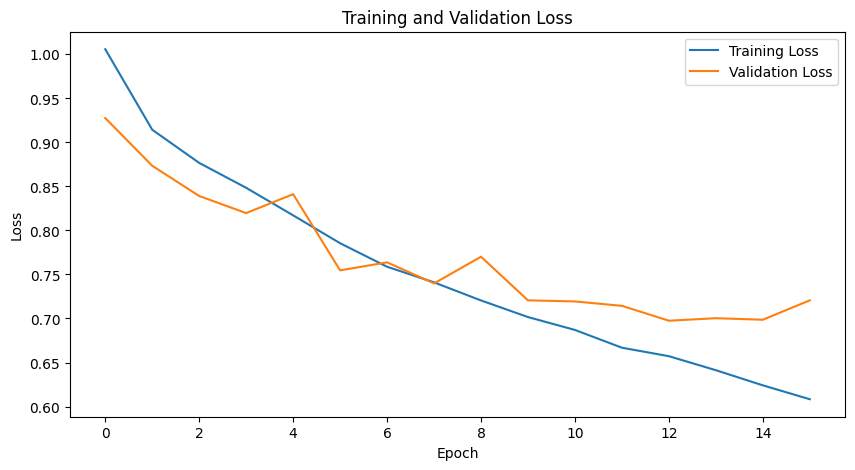

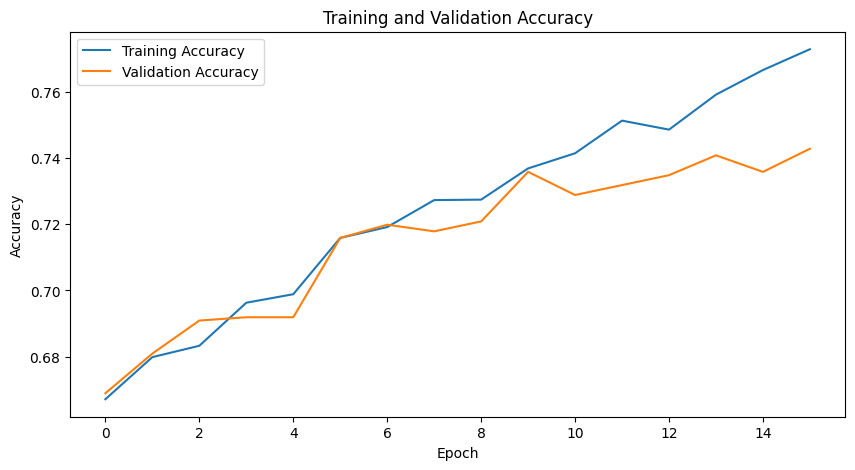

In [15]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Evaluation

After training is done and you are comfortable with performance by checking validation data, you can test the performance of your model on test data.


## Task 6
Test your model performace using test dataset. You may use
[this](https://keras.io/api/models/model_training_apis/#evaluate-method) and [this](https://keras.io/api/models/model_training_apis/#predict-method) functions. If you don't satisfy with results, go back, adjust your hyperparameters, start training your model again.

<b>Some Notes: </b>

* Don't forget to use <b>batch size</b> again because you pass the test dataset into your model. Without batch size, the GPU couldn't handle all (2,005) test samples at once.
* Use precision and recall metrics here as well.



In [16]:

test_loss, test_accuracy = model.evaluate(test_images, test_labels, batch_size=32)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

from sklearn.metrics import precision_score, recall_score


y_pred_prob = model.predict(test_images)


y_pred = np.argmax(y_pred_prob, axis=1)


precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')



63/63 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.7406
Test Loss: 0.7050
Test Accuracy: 0.7406
63/63 [==============================] - 0s 2ms/step
Precision: 0.6978
Recall: 0.7406


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Submission

If you finished all tasks, congratulations on this homework! You can compare the performance of your model with benchmarking results [here](https://medmnist.com/#:~:text=ChestMNIST-,DermaMNIST,-OCTMNIST). Although they compare results with only AUC and accuracy metrics, you can have a basic assumptions about your model.

<br>

<b>Submission Requirements of the Homework 3:</b>

* Save this notebook file.
* Save your plots for the loss and metric results.
* Save your test scores for the loss and metrics.
* DO NOT SEND your model's weights.
* Compress your homework folder with <b>.zip</b> extension.
* Send email to [umutkaankavakli@ogr.eskisehir.edu.tr](mailto:umutkaankavakli@ogr.eskisehir.edu.tr) with your homework file.  


This homework was designed by Umut Kaan Kavaklı.  